In [1]:
import numpy as np
import time
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
origin_data = np.loadtxt("data.txt")

In [3]:
origin_data_2 = pd.read_csv("R_modelling/selected_features_remove_outliers.csv")
origin_data_2 = origin_data_2.values

In [4]:
print(origin_data.shape)
print(origin_data_2.shape)

(10580, 181)
(9972, 59)


In [5]:
data = origin_data
data2 = origin_data_2

In [6]:
dataX = data[:,0:-1]
dataY = data[:,-1]

dataX2 = data2[:,0:-1]
dataY2 = data2[:,-1]

In [29]:
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size = 0.2, shuffle = True)
trainX2, testX2, trainY2, testY2 = train_test_split(dataX2, dataY2, test_size = 0.2, shuffle = True)

# Some stats

In [25]:
mir_zscore = np.abs(stats.zscore(dataY))
print(mir_zscore)
outliers_zscore = np.where(mir_zscore > 3)
print(outliers_zscore)
print(len(outliers_zscore[0]))

[5.60279884 2.78897127 0.40389807 ... 0.37960693 0.16216429 0.24599199]
(array([   0,   66,  110,  138,  140,  141,  147,  169,  170,  175,  207,
        234,  237,  241,  270,  279,  280,  322,  325,  390,  448, 1607,
       1658, 1681, 1686, 1797, 1952, 2330, 3020, 3021, 3048, 3052, 3054,
       3056, 3059, 3060, 3063, 3071, 3079, 3080, 3081, 3082, 3086, 3122,
       3130, 3141, 3158, 3161, 3166, 3167, 3189, 3190, 3193, 3194, 3195,
       3197, 3210, 3211, 3213, 3227, 3230, 3234, 3236, 3254, 3257, 3261,
       3299, 3300, 3306, 3344, 3345, 3346, 3406, 3407, 3408, 3409, 3410,
       3412, 3461, 3463, 3464, 3469, 3524, 3538, 3563, 3571, 3579, 3595,
       3607, 3610, 3618, 3621, 3624, 3626, 3627, 3638, 4089, 4221, 4229,
       4307, 4532, 4564, 4598, 4678, 4700, 4701, 4706, 4738, 5026, 5048,
       5081, 6043, 6109, 6184, 6218, 6323, 6432, 6561, 7622, 7731, 7790,
       7836, 8051, 8842, 9067, 9068, 9095, 9129, 9133, 9169, 9177, 9208,
       9236, 9237, 9242, 9252, 9254, 9257, 9260, 92

In [26]:
dataX_drop = np.delete(dataX, outliers_zscore[0], axis=0)
dataY_drop = np.delete(dataY, outliers_zscore[0], axis=0)

In [27]:
dataX = dataX_drop
dataY = dataY_drop

In [28]:
dataX.shape

(10428, 180)

# Random Forest

In [18]:
def model_RF_test(model_RF, dataX, dataY):
    print("Model performance")
    predict_data = model_RF.predict(dataX)
    
    # Some stats
    print("MSE:", metrics.mean_squared_error(dataY, predict_data))
    print("MAE:", metrics.mean_absolute_error(dataY, predict_data))
    print("R2:", metrics.r2_score(dataY, predict_data))
    errors = abs((dataY - predict_data) / dataY)
    mean_errors = np.mean(errors)
    mean_accuracy = 1 - mean_errors
    print("Mean Accuracy:", mean_accuracy * 100)
    
    plt.figure(1)
    plt.xlabel('True MIR')
    plt.ylabel('Predicted MIR')
    plt.plot(dataY, predict_data, "*")
    plt.show()
    
    plt.figure(2)
    plt.plot(dataY, label = 'actual data')
    plt.plot(predict_data, label = 'predict data')
    plt.xlabel('Tract')
    plt.ylabel('MIR')
    plt.legend(loc = 'best')
    plt.show()
    
    return predict_data, errors

In [34]:
# A reminder: When I tried to use MAE as the criterion of RandomForestRegressor, I found that it took so much time,
# and that's beacuase the scikilt-learn::RandomForest package has some problems when dealing with MAE.
# The discuss link is: https://github.com/scikit-learn/scikit-learn/issues/9626
# This problem is stil not solved. If you are interested, you can take part in solving that through this link.
# Currently, MAE took N(O^2) time, so be careful to use that.

In [65]:
time_start = time.time()
model_RF = RandomForestRegressor(n_estimators=500,
                                 criterion="mse",
                                 n_jobs = -1,
                                 max_features="sqrt",
                                 max_depth= None,
                                 bootstrap=True,
                                 )
model_RF.fit(dataX, dataY)
print("time consumed:", time.time() - time_start)

time consumed: 8.201430320739746


In [35]:
model_RF.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=308617617, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=91168287, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_wei

In [36]:
model_RF.feature_importances_

array([5.08650461e-04, 9.37911745e-03, 1.03115097e-03, 1.83473249e-03,
       1.00056627e-02, 1.46399717e-03, 1.23832106e-02, 8.39330152e-03,
       1.71994760e-03, 1.43609292e-03, 1.03146587e-03, 9.40540196e-04,
       9.30149615e-03, 4.53132535e-03, 3.82753983e-03, 3.64865648e-03,
       4.22356735e-03, 4.37343655e-04, 9.72616273e-03, 7.29450505e-03,
       1.07692277e-02, 6.06536152e-03, 6.89603065e-03, 2.64535721e-03,
       7.83238762e-03, 9.49949648e-03, 1.00930926e-03, 6.24054334e-03,
       1.43635032e-02, 1.54131028e-03, 1.47685998e-03, 2.17412666e-03,
       9.23120785e-04, 1.33987876e-02, 4.86184414e-04, 1.35097640e-03,
       7.83409990e-03, 1.59317945e-03, 2.73397878e-03, 1.67573719e-03,
       1.63785505e-03, 1.22742207e-04, 8.60310003e-04, 7.39492966e-03,
       1.87969087e-02, 3.82814286e-03, 4.98966379e-03, 4.81751158e-03,
       5.83380164e-03, 4.03517408e-03, 3.26497903e-03, 6.25469533e-03,
       5.45907302e-04, 7.44358186e-04, 6.14881275e-04, 7.83115967e-05,
      

## Find best model 1

In [39]:
time_start = time.time()
params_RF_grid_1 = {
    'n_estimators' : [500, 1000],
    'max_features' : [90, 'sqrt', None],
    'max_depth' : [10, None],
    'min_samples_leaf' : [1,2]
}
CV_model_RF_1 = GridSearchCV(model_RF, params_RF_grid_1, cv=5)
CV_model_RF_1.fit(dataX, dataY)
print("time consumed:", time.time() - time_start)

time consumed: 6569.04248213768


In [40]:
CV_model_RF_1.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [41]:
CV_model_RF_1.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 1000}

In [37]:
time_start = time.time()
model_RF_best_1 = RandomForestRegressor(n_estimators=1000,
                                 criterion="mse",
                                 n_jobs = -1,
                                 max_features="sqrt",
                                 max_depth=None,
                                 bootstrap=True,
                                 min_samples_leaf=2
                                 )
model_RF_best_1.fit(trainX, trainY)
print("Time consumed:", time.time() - time_start)

Time consumed: 3.5605108737945557


Model performance
MSE: 24546.55561535642
MAE: 88.58470081456623
R2: 0.8417935370866155
Mean Accuracy: -2.2087876413968477


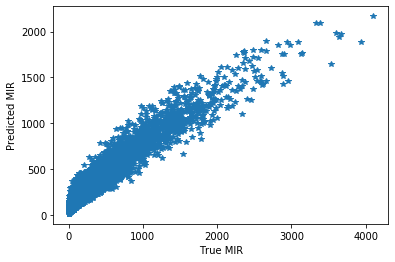

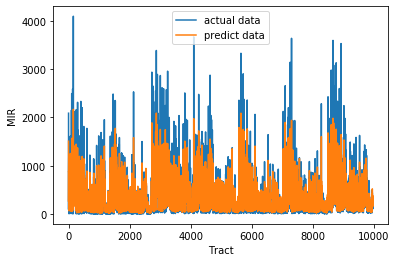

In [36]:
predict_best_1, error_best_1 = model_RF_test(model_RF_best_1, dataX, dataY)

In [34]:
predict_best_1, error_best_1 = model_RF_test(model_RF_best_1, dataX, dataY)

TypeError: bad operand type for unary -: 'tuple'

In [ ]:
len(sorted_error_best_1[sorted_error_best_1<1])

## Find best model 2

In [28]:
time_start = time.time()
params_RF_grid_2 = {
    'n_estimators' : [1000, 1500],
    'max_features' : ['sqrt', 54],
    'min_samples_leaf' : [2,3]
}
CV_model_RF_2 = GridSearchCV(model_RF, params_RF_grid_2, cv=5)
CV_model_RF_2.fit(dataX, dataY)
print("time consumed:", time.time() - time_start)

time consumed: 1527.874219417572


In [9]:
CV_model_RF_2.best_estimator_

NameError: name 'CV_model_RF_2' is not defined

In [ ]:
CV_model_RF_2.best_params_

In [11]:
time_start = time.time()
model_RF_best_2 = RandomForestRegressor(n_estimators=1500,
                                 criterion="mse",
                                 n_jobs = -1,
                                 max_features=None,
                                 max_depth=None,
                                 bootstrap=True,
                                 min_samples_leaf=2
                                 )
model_RF_best_2.fit(trainX, trainY)
print("Time consumed:", time.time() - time_start)

Time consumed: 263.9204020500183


Model performance
MSE: 34288.614746789746
MAE: 95.8086760069219
R2: 0.7790044133973885
Mean Accuracy: 3.1199471493016384


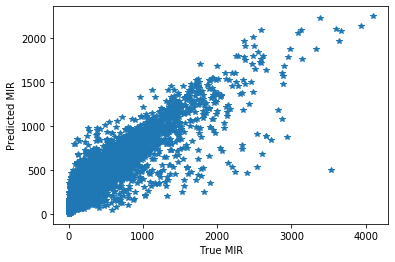

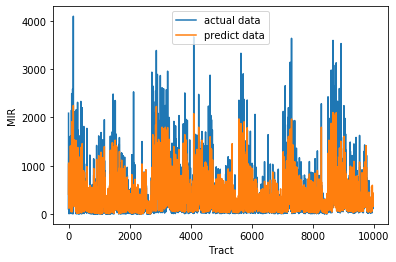

In [42]:
predict_best_2, error_best_2 = model_RF_test(model_RF_best_2, dataX, dataY)

Model performance
MSE: 18586.29613311455
MAE: 74.38176924706629
R2: 0.8773592615339249
Mean Accuracy: 23.60055190555661


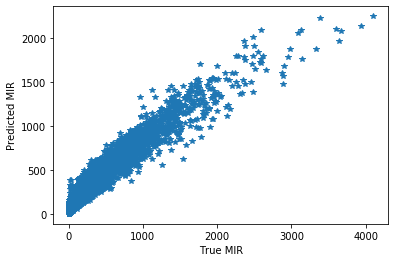

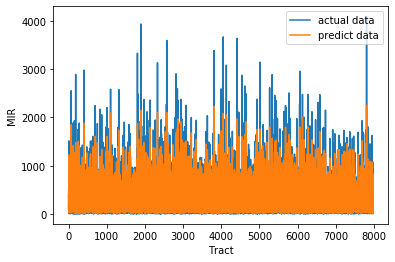

In [43]:
predict_best_2_train, error_best_2_train = model_RF_test(model_RF_best_2, trainX, trainY)

Model performance
MSE: 97074.27669229702
MAE: 181.48408213392352
R2: 0.42728549258129633
Mean Accuracy: -78.77167397382917


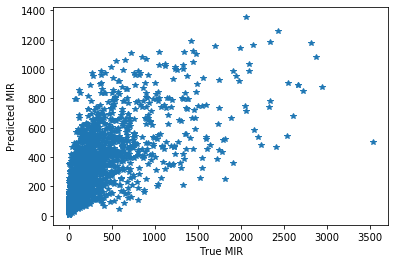

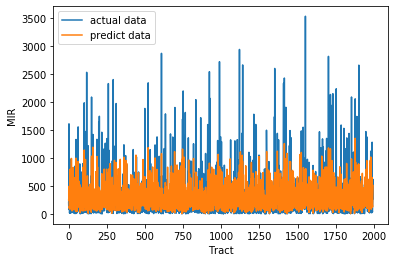

In [44]:
predict_best_2_test, error_best_2_test = model_RF_test(model_RF_best_2, testX, testY)

In [47]:
len(error_best_2_test)

1995

In [52]:
len(error_best_2_test[error_best_2_test<1])

1304

In [50]:
testX[error_best_2_test>5]

array([[1.366e+03, 0.000e+00, 1.600e+01, ..., 1.960e+01, 1.110e+01,
        4.800e+00],
       [2.848e+03, 3.100e+01, 1.100e+01, ..., 1.500e+01, 5.800e+00,
        1.290e+01],
       [2.434e+03, 9.000e+00, 4.800e+01, ..., 1.300e+01, 4.700e+00,
        8.500e+00],
       ...,
       [2.919e+03, 1.670e+02, 4.600e+01, ..., 5.100e+00, 2.600e+00,
        6.100e+00],
       [2.960e+02, 1.650e+02, 1.850e+02, ..., 9.500e+00, 5.100e+00,
        7.300e+00],
       [1.564e+03, 2.400e+01, 0.000e+00, ..., 1.830e+01, 9.900e+00,
        4.500e+00]])

In [51]:
predict_best_2_test[error_best_2_test>5]

array([108.96893371, 105.32904508,  50.84087297,  24.66005291,
        75.34775258, 194.18805957, 189.3377045 ,  10.4383822 ,
        70.40157105, 420.40575877, 241.43951571, 196.73399597,
       237.81139471, 150.44103908, 175.62242979,  79.06982085,
       359.76816575, 120.29675392,  71.15968187, 242.59283143,
        49.45852707, 139.29510315, 106.88559468, 411.04726123,
       298.76097656, 354.16853523, 152.66467193,  96.30015107,
       298.8283314 , 498.30258503, 264.01760189,  83.58489601,
        73.83149601, 217.36082338,  80.94531215, 113.92067371,
       209.97141982, 240.05356661, 261.40903304,  43.0891362 ,
       105.13701072, 835.69953919, 226.80557305, 122.12627341,
       857.06376654, 369.45549565, 163.46157967, 110.22283107,
        36.63200668,  93.41266789, 258.84740728, 100.44331876,
       236.19496349,  71.42694742,  91.80189154,  87.26826535,
       219.61706241, 252.98489944,  91.32085035, 175.05192668,
        64.0044882 ,  71.67192409,  42.84477968,  72.41

## Find best model 3

In [12]:
time_start = time.time()
params_RF_grid_3 = {
    'n_estimators' : [1500, 3000],
    'max_features' : ['sqrt', 'log2'],
    'min_samples_leaf' : [2,4]
}
CV_model_RF_3 = GridSearchCV(model_RF_best_2, params_RF_grid_3, cv=5)
CV_model_RF_3.fit(dataX, dataY)
print("time consumed:", time.time() - time_start)

time consumed: 998.9455091953278


In [13]:
CV_model_RF_3.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [14]:
CV_model_RF_3.best_params_

{'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 3000}

In [51]:
time_start = time.time()
model_RF_best_3 = RandomForestRegressor(n_estimators=8000,
                                 criterion="mse",
                                 n_jobs = -1,
                                 max_features="log2",
                                 max_depth=None,
                                 bootstrap=True,
                                 min_samples_leaf=2
                                 )
model_RF_best_3.fit(trainX, trainY)
print("Time consumed:", time.time() - time_start)

Time consumed: 45.644662857055664


In [ ]:
Model performance
MSE: 32403.941928481967
MAE: 104.79605102337517
R2: 0.749274050290973
Mean Accuracy: -143.45037342239536

Model performance
MSE: 32370.70942826029
MAE: 104.69326781135483
R2: 0.7495311872219574
Mean Accuracy: -142.8912448461428


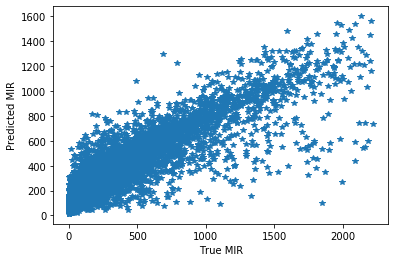

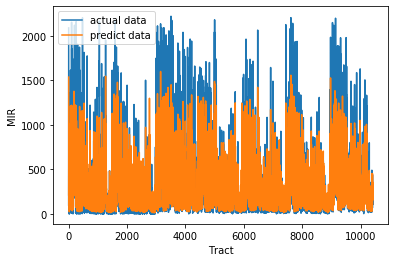

In [52]:
predict_best_3, error_best_3 = model_RF_test(model_RF_best_3, dataX, dataY)

In [47]:
Model performance
MSE: 15652.55026341196
MAE: 76.24086112028814
R2: 0.8777988460181569
Mean Accuracy: -60.07442767431355

SyntaxError: invalid syntax (<ipython-input-47-0f67cd140fd6>, line 1)

Model performance
MSE: 19053.412290831042
MAE: 84.49209409438943
R2: 0.851247948094827
Mean Accuracy: -79.22500201232099


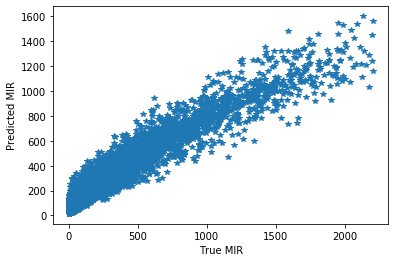

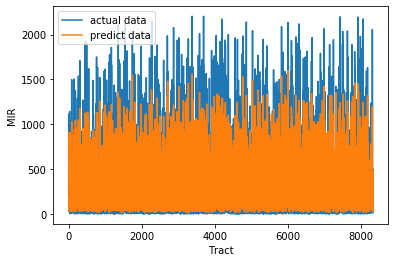

In [53]:
predict_best_3_train, error_best_3_train = model_RF_test(model_RF_best_3, trainX, trainY)

In [49]:
Model performance
MSE: 85548.88172184682
MAE: 187.9421820789879
R2: 0.3608148287284513
Mean Accuracy: -394.84469214053746

SyntaxError: invalid syntax (<ipython-input-49-6c2c9348c0ae>, line 1)

Model performance
MSE: 85627.12971610052
MAE: 185.47859434391734
R2: 0.36023019270981427
Mean Accuracy: -397.49517472137825


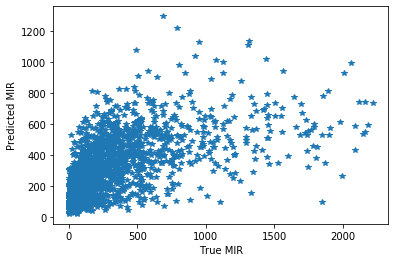

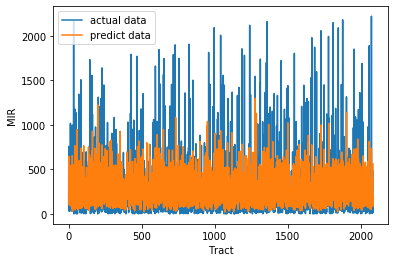

In [54]:
predict_best_3_test, error_best_3_test = model_RF_test(model_RF_best_3, testX, testY)